<font color="#FF8C00"><h2>Problem Statement:</h2></font>

A Retail Store  has multiple outlets across the country. They are facing issues in managing the inventory - to match the demand with respect to supply.


<font color="#A04F0E"><h2>Dataset Information:</h2></font>

You are provided with the Weekly Sales data for their various outlets. The data contains 6435 rows and  8 columns.

| Feature Name   | Description                                      |
|----------------|--------------------------------------------------|
| <font color="#D4A669">Stores</font>          | Store number                                     |
| <font color="#D4A669">Date</font>           | Week of Sales                                    |
| <font color="#D4A669">Weekly_Sales</font>   | Sales for the given store in that week            |
| <font color="#D4A669">Holiday_Flag</font>   | Indicates if it is a holiday week                 |
| <font color="#D4A669">Temperature</font>    | Temperature on the day of the sale                |
| <font color="#D4A669">Fuel_Price</font>     | Cost of fuel in the region                        |
| <font color="#D4A669">CPI</font>           | Consumer Price Index                              |
| <font color="#D4A669">Unemployment</font>   | Unemployment Rate                                 |

<font color="#FF8C00"><h2>Objectives:</h2></font>

Performance Drivers:

* How do economic conditions like unemployment and CPI affect our sales? Which stores suffer the most during economic downturns?
* Do our sales follow a seasonal pattern? When are our peak seasons and why?
* Does weather, specifically temperature, have any measurable impact on what customers buy?

Store Benchmarking:
* Who are our star performers? Which stores consistently bring in the most revenue?
* Which are our underperforming stores, and how big is the gap between them and our top stores?

Future Outlook:
* What will the weekly sales for each store look like for the next 12 weeks?


<font color='Orange'><h1>Importing the libraries </h1></font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder ,StandardScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Walmart (1).csv')


### Fetching first five rows of data

In [ ]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

### Fetching last five rows of data

In [ ]:
df.tail()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667

### Shape of data

In [ ]:
df.shape

(6435, 8)

 <font color='Orange'><h1>Basic EDA and Data Cleaning </h1></font>

### Basic information of data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### Changing Data types

In [ ]:
# converting Date columns to data

df['Date']=pd.to_datetime(df['Date'])

In [ ]:
# converting holiday flag to bool

df['Holiday_Flag']=df['Holiday_Flag'].astype('category')

In [ ]:
# converting store to category

df['Store']=df['Store'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(5)
memory usage: 315.9 KB


### Adding New Columns to Dataframe

In [ ]:
# Adding year column
df['Year']=df['Date'].dt.year

# Adding month column
df['Month']=df['Date'].dt.month

# Adding week column
df['Week']=df['Date'].dt.week


In [ ]:
df.head()

Store       Date  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
0     1 2010-05-02    1643690.90            0        42.31       2.572   
1     1 2010-12-02    1641957.44            1        38.51       2.548   
2     1 2010-02-19    1611968.17            0        39.93       2.514   
3     1 2010-02-26    1409727.59            0        46.63       2.561   
4     1 2010-05-03    1554806.68            0        46.50       2.625   

          CPI  Unemployment  Year  Month  Week  
0  211.096358         8.106  2010      5    17  
1  211.242170         8.106  2010     12    48  
2  211.289143         8.106  2010      2     7  
3  211.319643         8.106  2010      2     8  
4  211.350143         8.106  2010      5    18

### Checking Null Values

In [ ]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
dtype: int64

### Reading the data for elementary statistics

In [ ]:
df.describe()

Weekly_Sales  Temperature   Fuel_Price          CPI  Unemployment  \
count  6.435000e+03  6435.000000  6435.000000  6435.000000   6435.000000   
mean   1.046965e+06    60.663782     3.358607   171.578394      7.999151   
std    5.643666e+05    18.444933     0.459020    39.356712      1.875885   
min    2.099862e+05    -2.060000     2.472000   126.064000      3.879000   
25%    5.533501e+05    47.460000     2.933000   131.735000      6.891000   
50%    9.607460e+05    62.670000     3.445000   182.616521      7.874000   
75%    1.420159e+06    74.940000     3.735000   212.743293      8.622000   
max    3.818686e+06   100.140000     4.468000   227.232807     14.313000   

              Year        Month         Week  
count  6435.000000  6435.000000  6435.000000  
mean   2010.965035     6.475524    26.000000  
std       0.797019     3.321797    14.511794  
min    2010.000000     1.000000     1.000000  
25%    2010.000000     4.000000    14.000000  
50%    2011.000000     6.000000    26.000000  
75%    2012.000000     9.000000    38.000000  
max    2012.000000    12.000000    52.000000

 <font color='Orange'><h1>Data Visualization</h1></font>

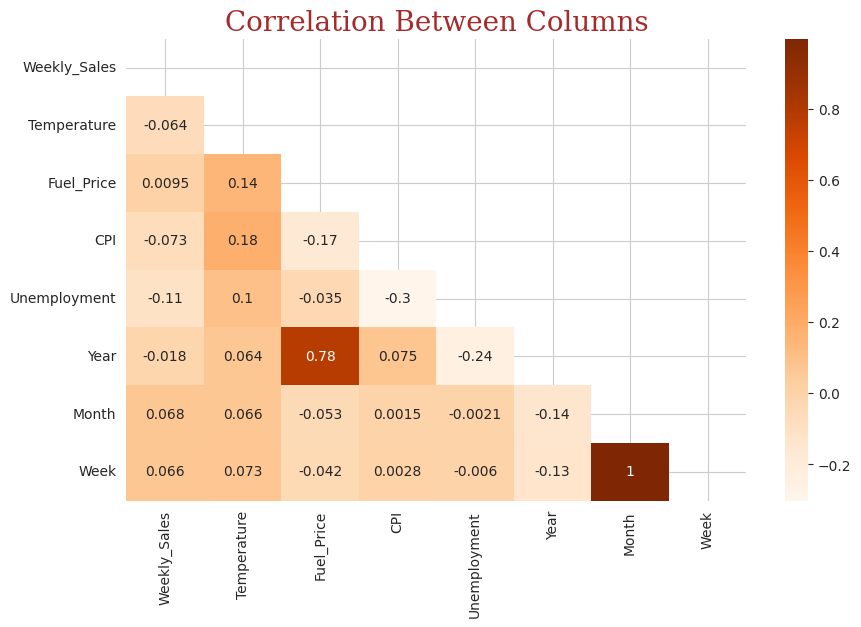

In [ ]:
# Checking at correlation between columns

plt.figure(figsize=(10,6))
mask=np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),annot=True,mask=mask,cmap='coolwarm')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Between Columns',fontdict={'fontsize':20,'color':'Brown','family':'serif'})
plt.show()

### Outlier Detection

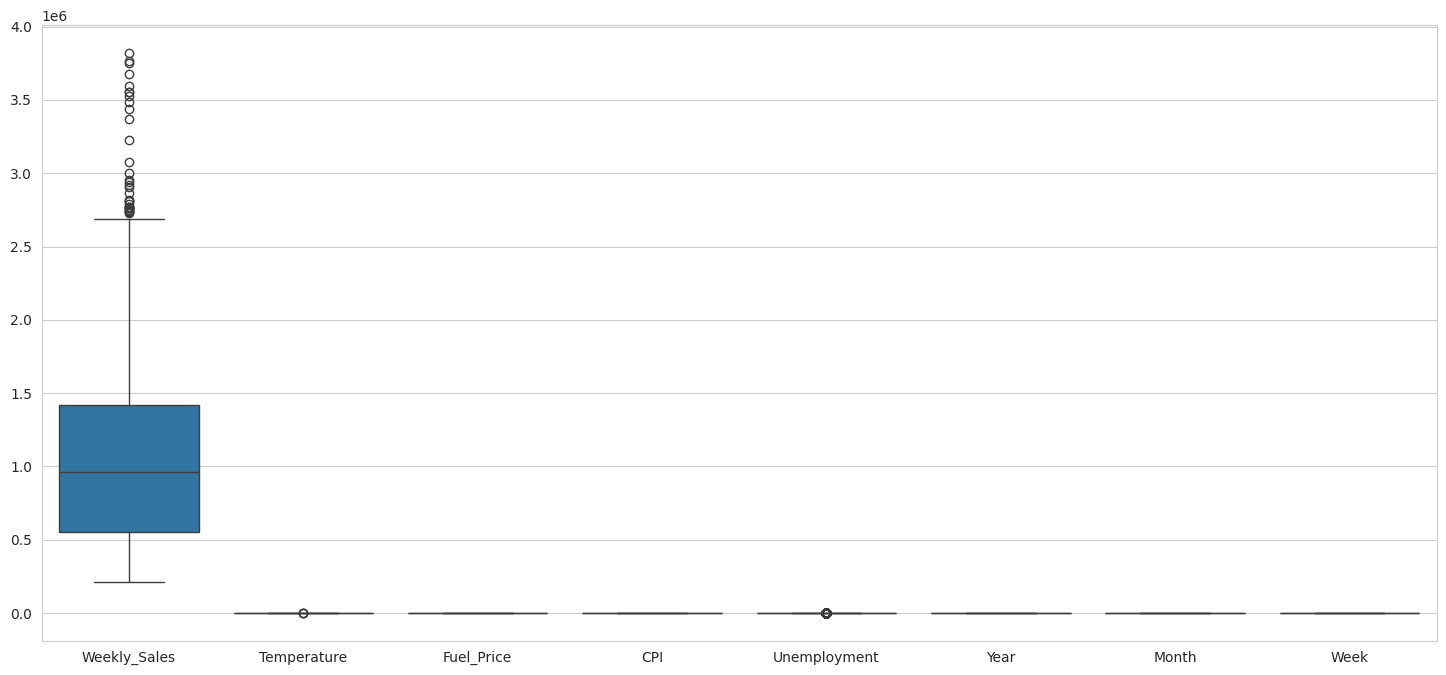

In [ ]:
# using boxplots

plt.figure(figsize=(18,8))
sns.boxplot(data=df, color='darkcyan')
plt.show()

### Outliers Treatment

In [ ]:
Q3=df['Weekly_Sales'].quantile(0.75)
Q1=df['Weekly_Sales'].quantile(0.25)
IQR=Q3-Q1
UpperLimit=Q3+1.5*IQR
LowerLimit=Q1-1.5*IQR


In [ ]:
filter= ((df['Weekly_Sales']<=UpperLimit) & (df['Weekly_Sales']>=LowerLimit))

df=df[filter]
df

Store       Date  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
0        1 2010-05-02    1643690.90            0        42.31       2.572   
1        1 2010-12-02    1641957.44            1        38.51       2.548   
2        1 2010-02-19    1611968.17            0        39.93       2.514   
3        1 2010-02-26    1409727.59            0        46.63       2.561   
4        1 2010-05-03    1554806.68            0        46.50       2.625   
...    ...        ...           ...          ...          ...         ...   
6430    45 2012-09-28     713173.95            0        64.88       3.997   
6431    45 2012-05-10     733455.07            0        64.89       3.985   
6432    45 2012-12-10     734464.36            0        54.47       4.000   
6433    45 2012-10-19     718125.53            0        56.47       3.969   
6434    45 2012-10-26     760281.43            0        58.85       3.882   

             CPI  Unemployment  Year  Month  Week  
0     211.096358         8.106  2010      5    17  
1     211.242170         8.106  2010     12    48  
2     211.289143         8.106  2010      2     7  
3     211.319643         8.106  2010      2     8  
4     211.350143         8.106  2010      5    18  
...          ...           ...   ...    ...   ...  
6430  192.013558         8.684  2012      9    39  
6431  192.170412         8.667  2012      5    19  
6432  192.327265         8.667  2012     12    50  
6433  192.330854         8.667  2012     10    42  
6434  192.308899         8.667  2012     10    43  

[6401 rows x 11 columns]

### Checking For Duplicate Values

In [ ]:
df.duplicated().sum()

0

<font color="#FF8C00"><h1>INSIGHTS that will give a clear perspective </font>

<font color="pink"><h3>If the Weekly Sales are affected by the Unemployment Rate </font>


##### Correlation Between WeeklySales and Unemployement Rate

In [ ]:
# Checking correlation between weekly sales and unemployment

WeekUnem_Corr=df['Weekly_Sales'].corr(df['Unemployment'])
print(f'The correlation coefficient of wwekly sales and unemployemnet rate is {WeekUnem_Corr}')

The correlation coefficient of wwekly sales and unemployemnet rate is -0.10429750912578388


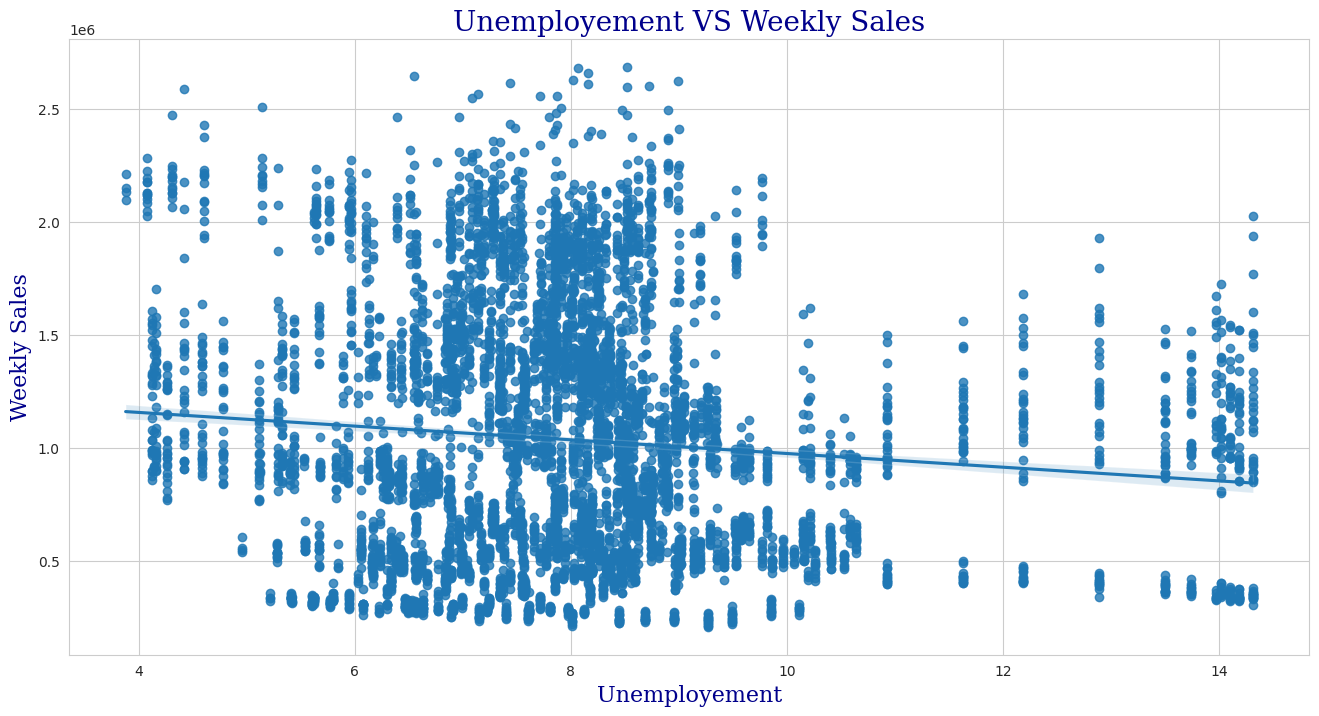

In [ ]:
# Plotting the regression Plot

plt.figure(figsize=(16,8))
sns.regplot(data=df,y='Weekly_Sales',x='Unemployment')
plt.title('Unemployement VS Weekly Sales',fontdict={'fontsize':20,'color':'seagreen','family':'serif'})
plt.xlabel('Unemployement',fontdict={'fontsize':14,'color':'darkblue','family':'serif'})
plt.ylabel('Weekly Sales',fontdict={'fontsize':14,'color':'darkblue','family':'serif'})
plt.show()





<font color="Pink"><h3>Which Stores are suffering the most? </font>

In [ ]:
#getting the correlation between weekly sales and unemployement and sorting it
sort_corr=df.groupby('Store')['Weekly_Sales','Unemployment'].corr().unstack().sort_values(by=('Weekly_Sales','Unemployment'))
sort_corr.reset_index(inplace=True)

# creating filter

min_corr=sort_corr[('Weekly_Sales','Unemployment')].min()
filt=(sort_corr[('Weekly_Sales','Unemployment')]==min_corr)

store=sort_corr.loc[filt,'Store']

print(f"Stores with Higest Negative correlation with unemployemnt rate {store[0]}")

Stores with Higest Negative correlation with unemployemnt rate 38


<font color="pink"><h3>If the Weekly Sales show a seasonal trend? </font>
 <font color="lightgreen"><h6>When and what could be the reason? </font>

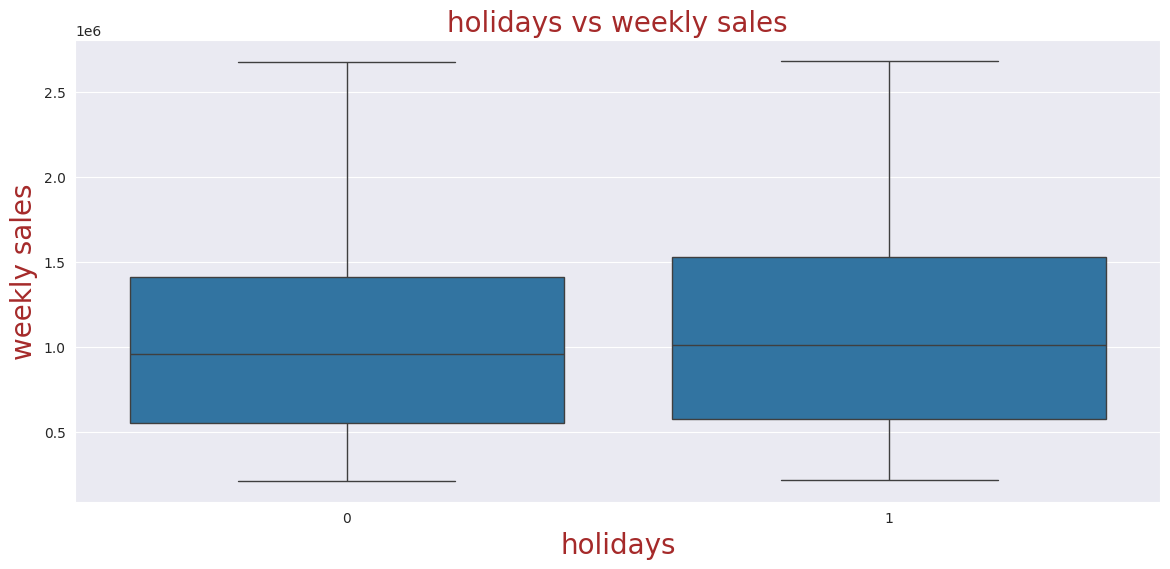

In [ ]:
#checking for holiday flag and how its affects weekly sales

plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.boxplot(data=df,x='Holiday_Flag',y='Weekly_Sales', color="#48CAE4")
plt.title('Holidays vs Weekly Sales',fontdict={'fontsize':14,'color':'#FF8C00'})
plt.xlabel('Holidays',fontdict={'fontsize':14,'color':'#FF8C00'})
plt.ylabel('Weekly Sales',fontdict={'fontsize':14,'color':'#FF8C00'})
plt.show()

  <font color="pink"><h3>Does temperature affect the Weekly Sales in any manner? </font>
    

<Figure size 1600x600 with 0 Axes>

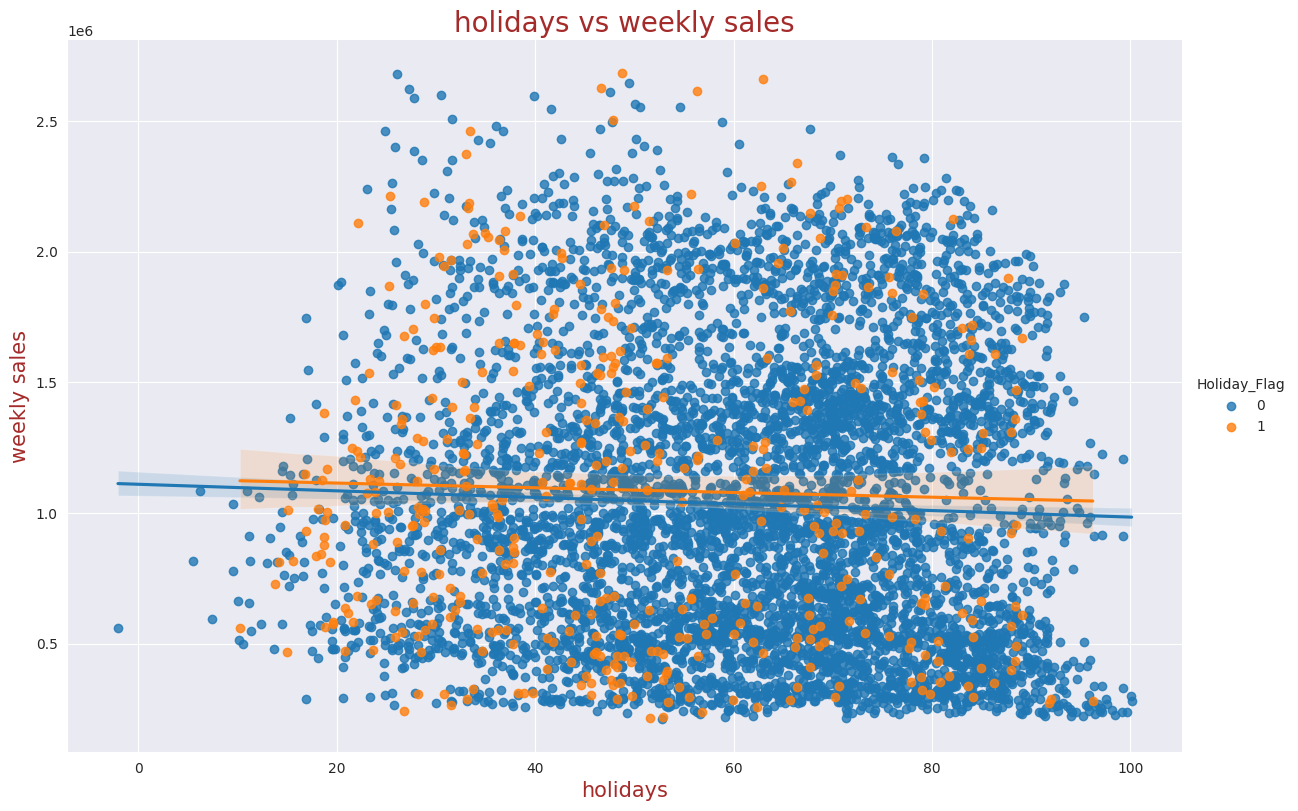

In [ ]:

#checking for temperature and how it affects weekly sales

plt.figure(figsize=(16,6))
sns.set_style('darkgrid')
sns.lmplot(data=df,x='Temperature',y='Weekly_Sales',hue='Holiday_Flag',height=8,aspect=1.5)
plt.title('holidays vs weekly sales',fontdict={'fontsize':14,'color':'brown'})
plt.xlabel('holidays',fontdict={'fontsize':14,'color':'brown'})
plt.ylabel('weekly sales',fontdict={'fontsize':14,'color':'brown'})
plt.show()

<font color="pink"><h3>Changes in Temperature over time</font>

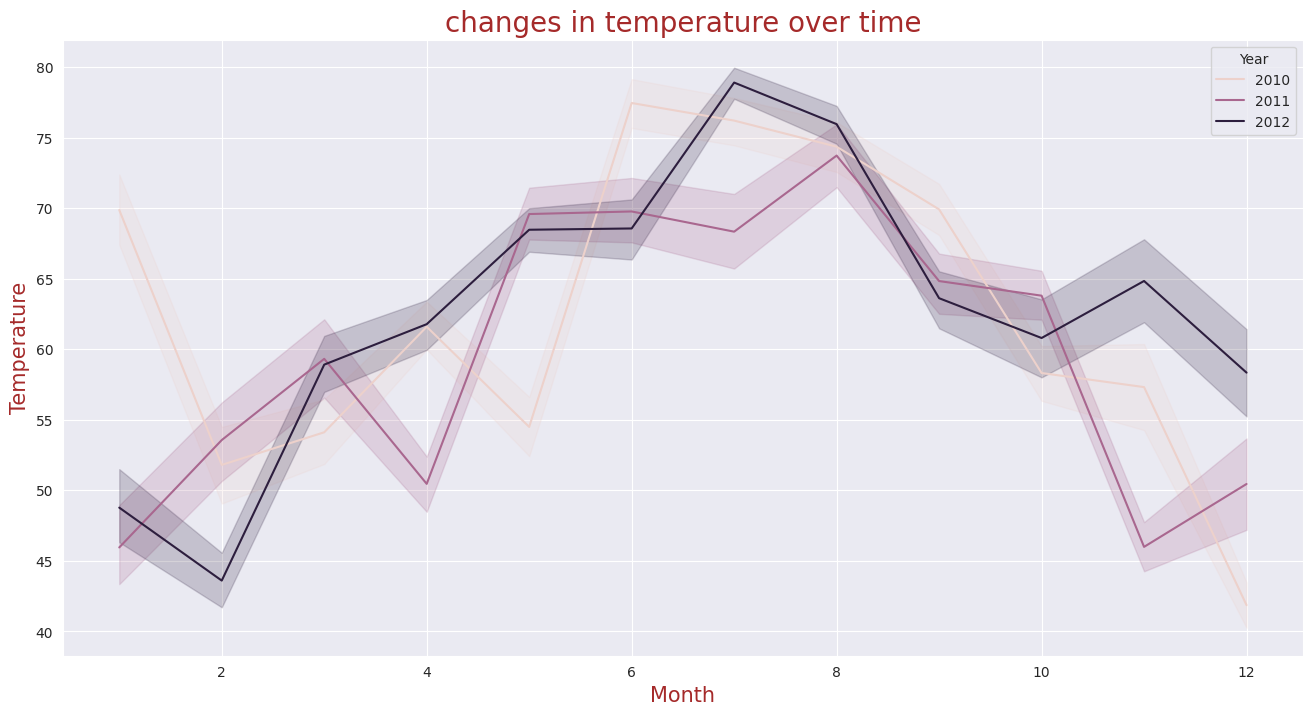

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df,x='Month',y='Temperature',hue='Year')
plt.title('changes in temperature over time',fontdict={'fontsize':20,'color':'Brown'})
plt.xlabel('Month',fontdict={'fontsize':14,'color':'seagreen'})
plt.ylabel('Temperature',fontdict={'fontsize':14,'color':'seagreen'})
plt.show()

<font color="Pink"><h3>How is the Consumer Price index (CPI) affecting the Weekly Sales of various Stores?</font>


In [ ]:
df.head()

Store       Date  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
0     1 2010-05-02    1643690.90            0        42.31       2.572   
1     1 2010-12-02    1641957.44            1        38.51       2.548   
2     1 2010-02-19    1611968.17            0        39.93       2.514   
3     1 2010-02-26    1409727.59            0        46.63       2.561   
4     1 2010-05-03    1554806.68            0        46.50       2.625   

          CPI  Unemployment  Year  Month  Week  
0  211.096358         8.106  2010      5    17  
1  211.242170         8.106  2010     12    48  
2  211.289143         8.106  2010      2     7  
3  211.319643         8.106  2010      2     8  
4  211.350143         8.106  2010      5    18

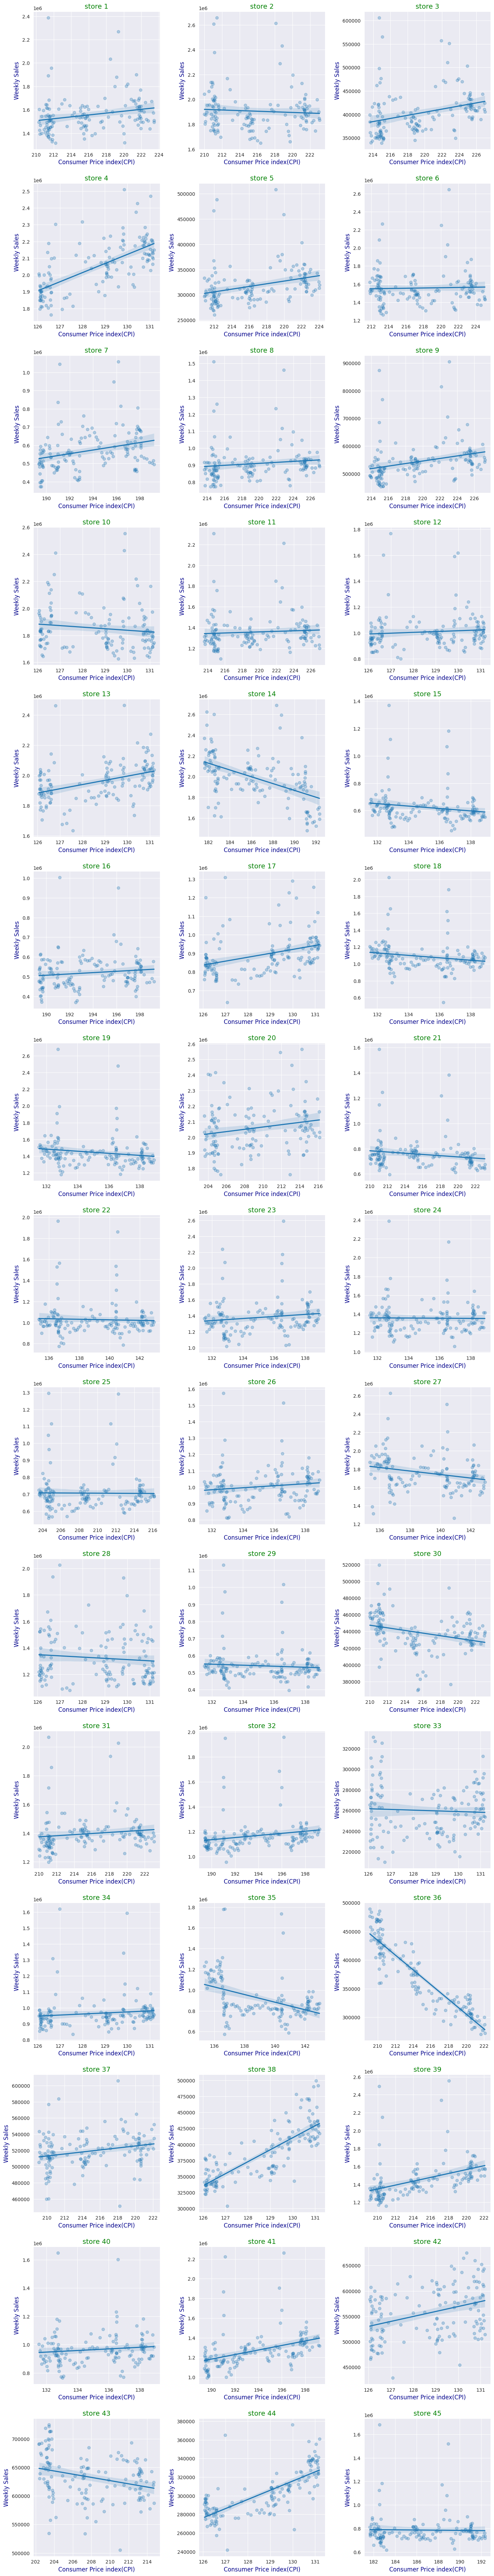

In [ ]:
# create a list of unique store numbers

stores=df['Store'].unique()

# set up subplots

fig,axes=plt.subplots(nrows=len(stores)//3,ncols=3,figsize=(15,5*len(stores)//3))
fig.tight_layout(pad=5.0)

#iterate over each store and create a scatter plot
for i ,store_num in enumerate(stores):
  row=i//3
  col=i% 3
  ax=axes[row,col]


  # filter the data for specific store

  store_data=df[df['Store']==store_num]

  # plot scatter plot with regression line
  sns.regplot(x='CPI',y='Weekly_Sales',data=store_data,ax=ax,scatter_kws={'alpha':0.3})
  ax.set_title(f'store {store_num}',fontdict={'fontsize':14,'color':'green'})
  ax.set_xlabel('Consumer Price index(CPI)',fontdict={'fontsize':12,'color':'darkcyan'})
  ax.set_ylabel('Weekly Sales',fontdict={'fontsize':12,'color':'darkcyan'})
plt.show()


<font color="Pink"><h3>Changes in CPI (CONSUMER PRICE INDEX) over time</font>

Text(0, 0.5, 'CPI')

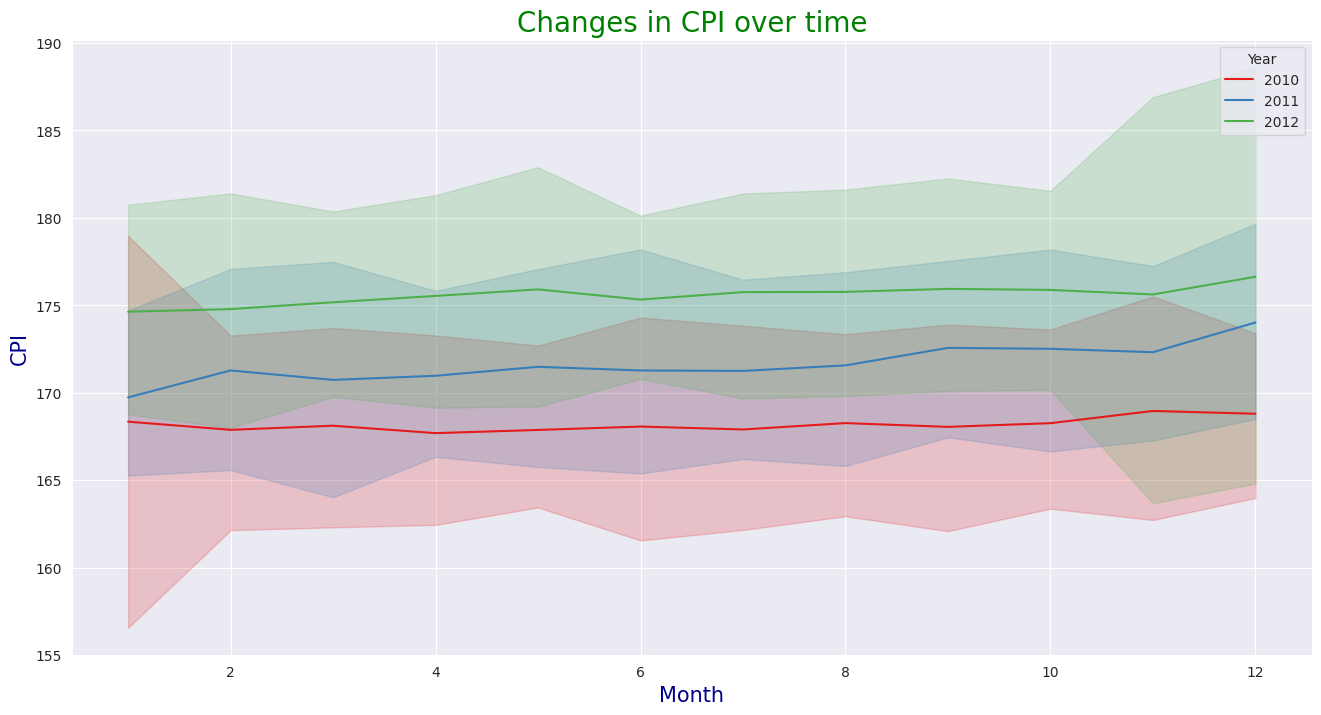

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df,x='Month',y='CPI',hue='Year',palette='Set2')
plt.title('Changes in CPI over time',fontdict={'fontsize':16,'color':'seagreen'})
plt.xlabel('Month',fontdict={'fontsize':14,'color':'darkblue'})
plt.ylabel('CPI',fontdict={'fontsize':14,'color':'darkblue'})


  <font color="Pink"><h4>How is the Fuel Prices are affecting the Weekly Sales of various Stores?</font>


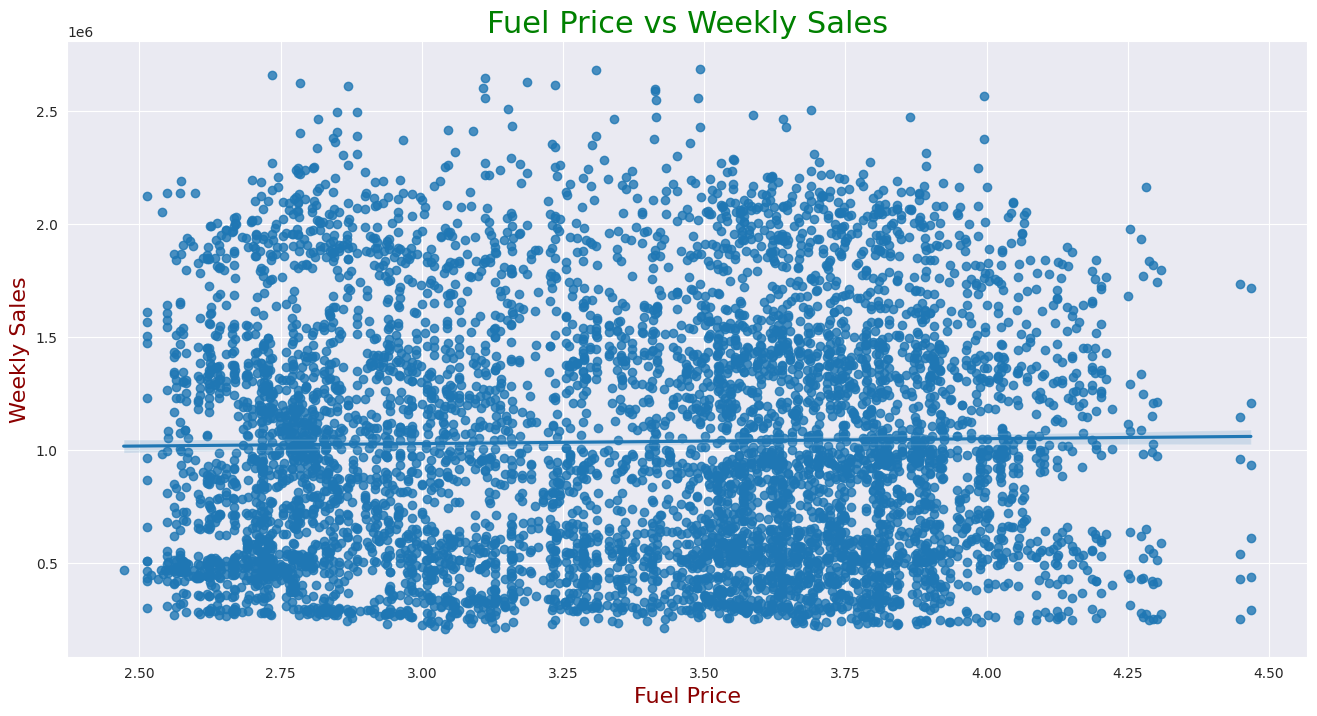

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
sns.regplot(data=df,x='Fuel_Price',y='Weekly_Sales')
plt.title('Fuel Price vs Weekly Sales',fontdict={'fontsize':16,'color':'darkcyan'})
plt.xlabel('Fuel Price',fontdict={'fontsize':14,'color':'brown'})
plt.ylabel('Weekly Sales',fontdict={'fontsize':14,'color':'brown'})
plt.show()

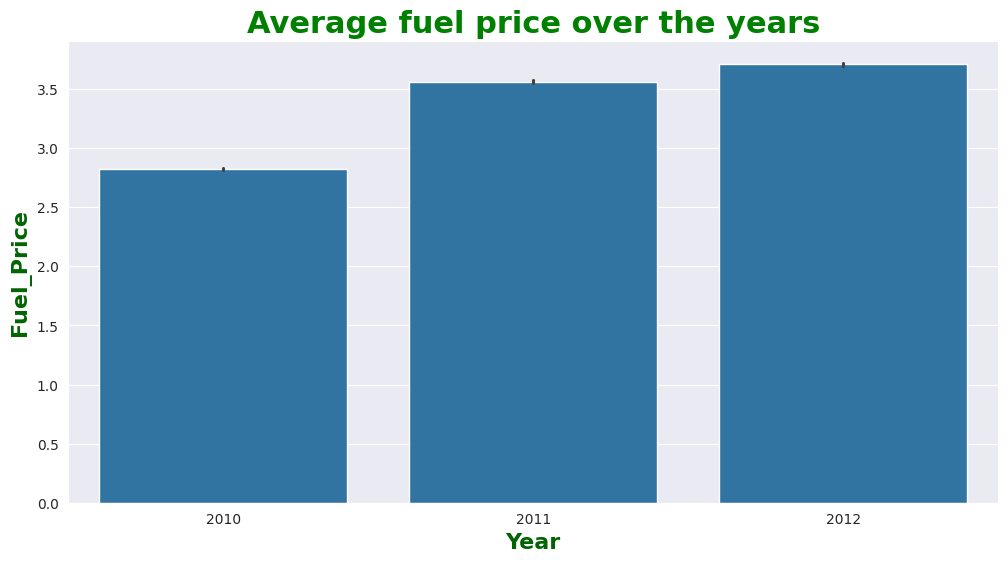

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='Year',y='Fuel_Price', color="darkcyan")
plt.title('Average fuel price over the years', fontdict={'fontsize':16,'color':'lightgreen'})
plt.xlabel('Year',color='green', fontsize=14)
plt.ylabel('Fuel_Price',color='green', fontsize=14)
plt.show()

  <font color="pink"><h4>Relation between Date and Weekly Sales</font>

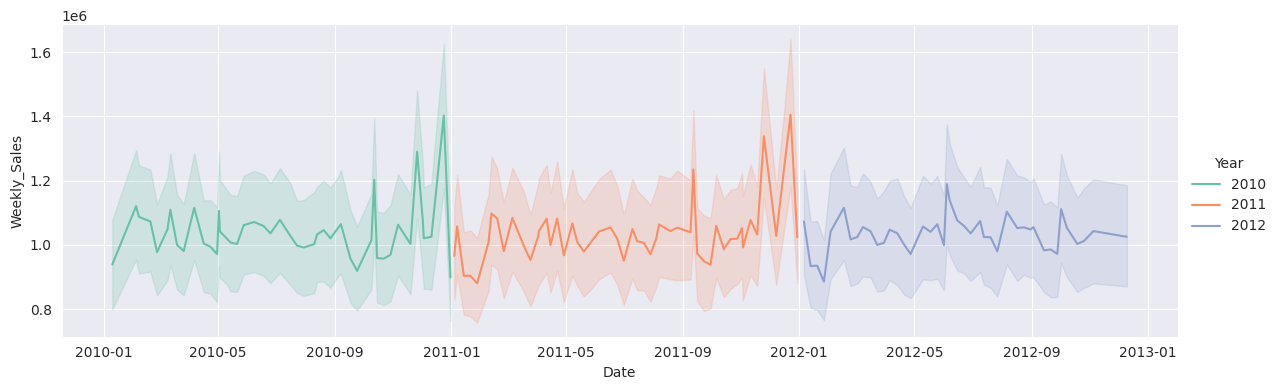

In [ ]:
sns.set_style('darkgrid')
sns.relplot(data=df,x='Date',y='Weekly_Sales',hue='Year',kind='line',height=4,aspect=3,palette='Set1')
plt.show()

  <font color="Pink"><h4>Relation between Store and Weekly Sales</font>

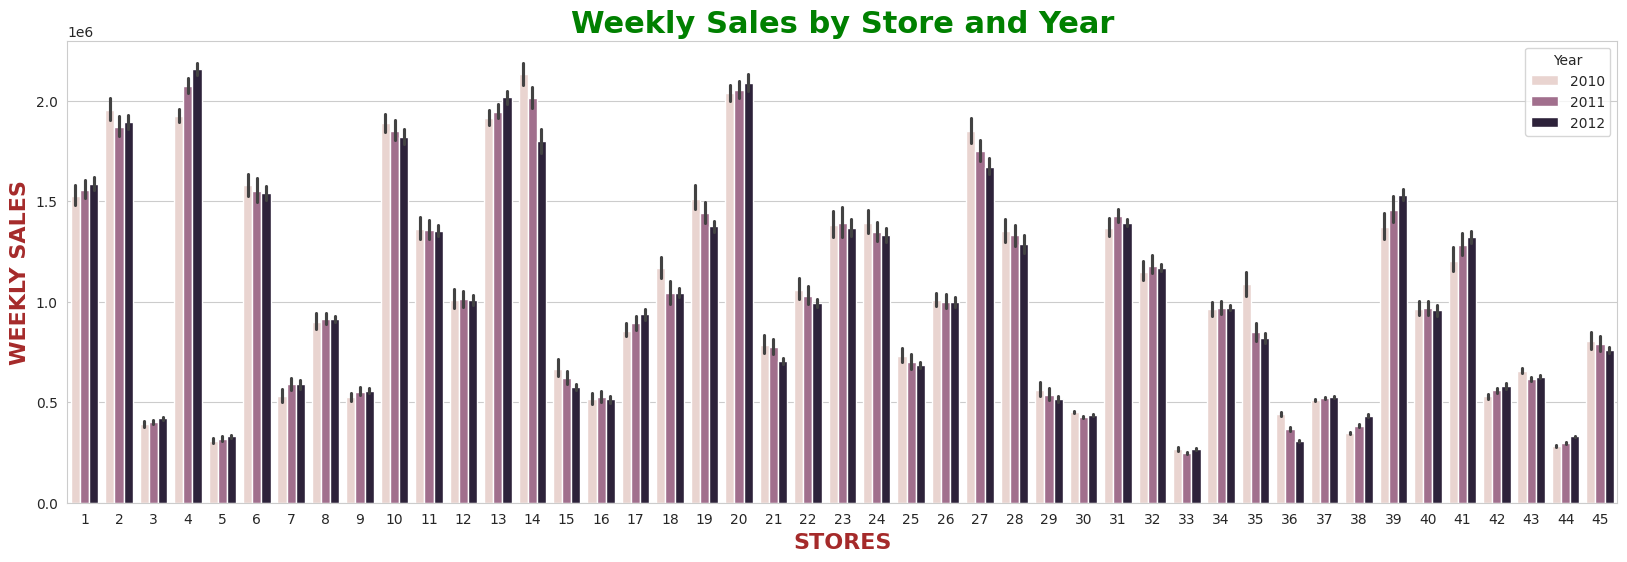

In [ ]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(data=df,x='Store',y='Weekly_Sales',hue='Year')
# Set the title
plt.title('Weekly Sales by Store and Year', fontdict={'fontsize':16,'color':'seagreen'})

# Set the x and y axis labels
plt.xlabel('STORES', color='brown', fontsize=14)
plt.ylabel('WEEKLY SALES', color='brown', fontsize=14)
plt.show()

  <font color='Pink'><h4>TOP Performing Stores according to the historical data</font>

  <font color="lightgreen"><h4>TOP Performing Stores year wiseaccording to the historical data</font>

In [ ]:
#grouping the data year wise and the store wise
performers=df.groupby(['Year','Store']).agg(Yearly_Sales=('Weekly_Sales','sum')).reset_index()
performers

Year Store  Yearly_Sales
0    2010     1   73278832.00
1    2010     2   91841856.51
2    2010     3   18745419.00
3    2010     4   86624230.83
4    2010     5   14836030.77
..    ...   ...           ...
130  2012    41   56887839.93
131  2012    42   24950359.85
132  2012    43   26975233.97
133  2012    44   14187373.72
134  2012    45   32723630.17

[135 rows x 3 columns]

In [ ]:
best_store=pd.DataFrame()
#getting unique values in year column

year=df.Year.unique()
for i in year:
  #filter the top performers for the current year
  filt=(performers['Year']==i)
  max_sale=performers[filt]['Yearly_Sales'].max()
  mask=(performers['Yearly_Sales']==max_sale)
  best_store=pd.concat([best_store,performers[filt][mask]])
best_store.reset_index(drop=True,inplace=True)
best_store

Year Store  Yearly_Sales
0  2010    14  9.595898e+07
1  2011    14  1.027272e+08
2  2012     4  9.277119e+07

In [ ]:
#changing the datatype to int for store column

best_store['Store']=best_store['Store'].astype('int')
unique_years=sorted(best_store['Year'].unique())

#plotting the graph for top performing stores
fig=px.bar(
    best_store,
    x='Year',
    y='Yearly_Sales',
    color='Store'
)

fig.update_layout(

    title='<b>Yearly Sales Trends: Top Performing Stores (2010-2012)</b>',
    xaxis_title='<b>Year</b>',
    yaxis_title='<b>Yearly Sales</b>',

)
fig.show()


 <font color='Pink'><h4>Worst Performing Stores according to the historical data</font>

In [ ]:
worst_store=pd.DataFrame()
#getting unique values in year column

year=df.Year.unique()
for i in year:
  #filter the top performers for the current year
  filt=(performers['Year']==i)
  max_sale=performers[filt]['Yearly_Sales'].min()
  mask=(performers['Yearly_Sales']==max_sale)
  worst_store=pd.concat([worst_store,performers[filt][mask]])
worst_store.reset_index(drop=True,inplace=True)
worst_store




#changing the datatype to int for store column

worst_store['Store']=worst_store['Store'].astype('int')
unique_years=sorted(worst_store['Year'].unique())

#plotting the graph for top performing stores
fig=px.bar(
    worst_store,
    x='Year',
    y='Yearly_Sales',
    color='Store'
)

fig.update_layout(

    title='<b>Yearly Sales Trends: Top Performing Stores (2010-2012)</b>',
    xaxis_title='<b>Year</b>',
    yaxis_title='<b>Yearly Sales</b>',

)
fig.show()


  <font color="pink"><h4>How significant is the difference between the HIGHEST and LOWEST Performing Stores</font>

In [ ]:
# To assess the significance of the difference between the highest and lowest performing stores
# we will calculate various statistical measures.

for i in year:
    filt = (performers['Year']==i)
    sales_range = performers[filt]['Yearly_Sales'].max() - performers[filt]['Yearly_Sales'].min()#range
    print('Stats for Yearly Sales in the year ',i)
    print('Range : ',sales_range)

    sales_mean = performers[filt]['Yearly_Sales'].mean() # Avg sales
    print('Average Sales : ',sales_mean)

    sales_std = performers[filt]['Yearly_Sales'].std()#std deviation
    print('Standtard Deviation : ',sales_std)

    cv = (sales_std / sales_mean) * 100#coefficient of Variance
    print('Relative Variance : ',cv)

    #percentile analysis
    sales_25th_percentile = performers[filt]['Yearly_Sales'].quantile(0.25)
    sales_75th_percentile = performers[filt]['Yearly_Sales'].quantile(0.75)
    print('25th_percentile : ',sales_25th_percentile)
    print('75th_percentile : ',sales_75th_percentile)
    print(' ')

Stats for Yearly Sales in the year  2010
Range :  83192150.55
Average Sales :  49501474.735999994
Standtard Deviation :  24543508.623179175
Relative Variance :  49.581368543208036
25th_percentile :  25568078.15
75th_percentile :  65782276.32
 
Stats for Yearly Sales in the year  2011
Range :  89769365.03999999
Average Sales :  53434914.90044444
Standtard Deviation :  26897017.527062986
Relative Variance :  50.33603511332488
25th_percentile :  29117302.669999998
75th_percentile :  74169225.52
 
Stats for Yearly Sales in the year  2012
Range :  81335638.21
Average Sales :  44447396.87444445
Standtard Deviation :  23019092.759410933
Relative Variance :  51.78951834780234
25th_percentile :  24827530.71
75th_percentile :  59212433.28
 


  <font color="pink"><h3>Distribution graph of columns </font>

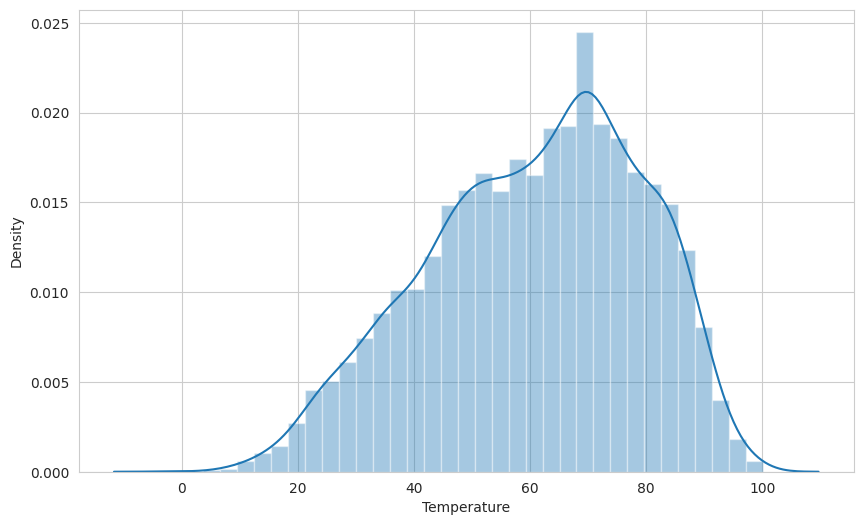

In [ ]:
#Temperature


plt.figure(figsize=(10,6))
sns.distplot(df['Temperature'])
plt.show()

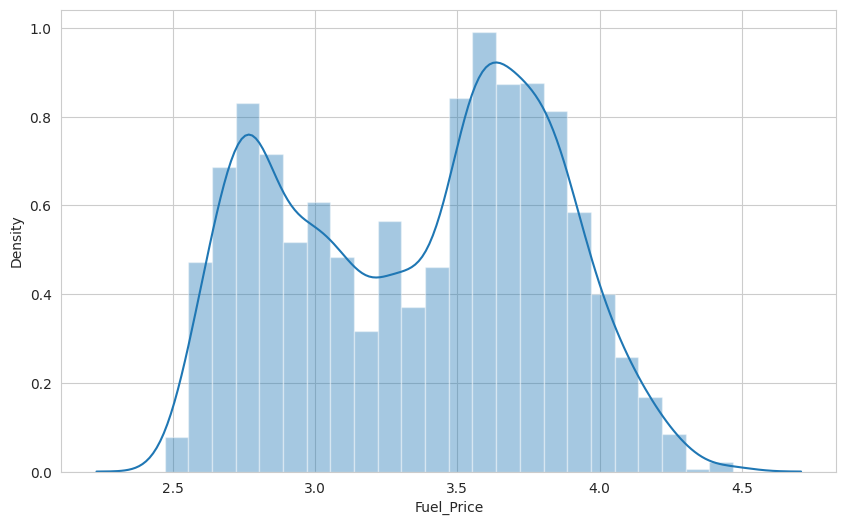

In [ ]:
# Fuel Price

plt.figure(figsize=(10,6))
sns.distplot(df['Fuel_Price'])
plt.show()

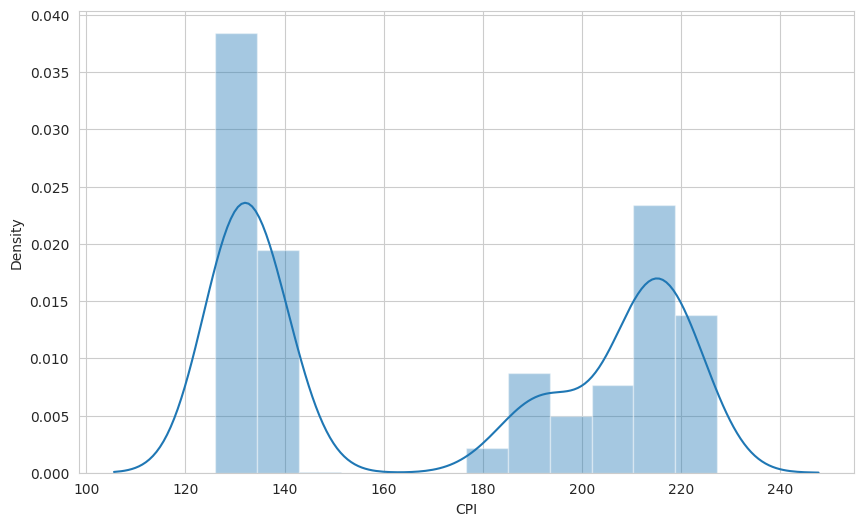

In [ ]:
#CPI


plt.figure(figsize=(10,6))
sns.distplot(df['CPI'])
plt.show()

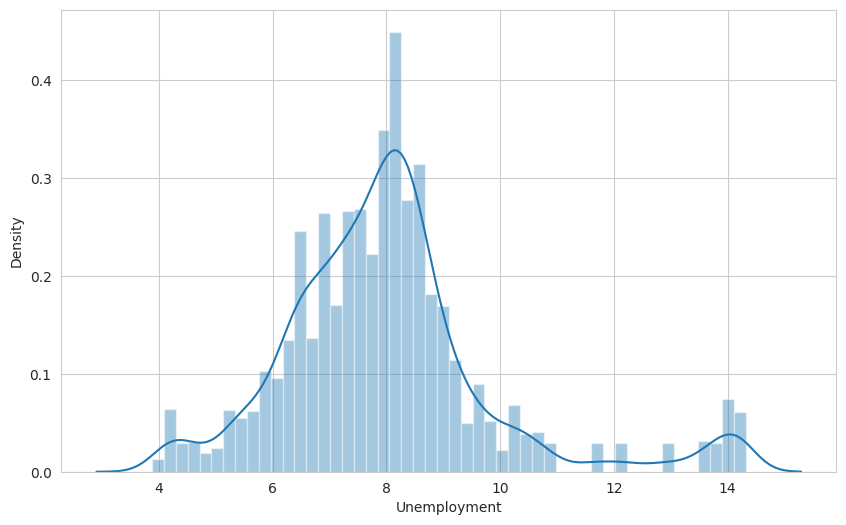

In [ ]:
#Unemployement


plt.figure(figsize=(10,6))
sns.distplot(df['Unemployment'])
plt.show()

In [ ]:
df.skew()

Weekly_Sales    0.497428
Temperature    -0.344571
Fuel_Price     -0.101046
CPI             0.061319
Unemployment    1.186512
Year            0.057389
Month           0.027883
Week            0.021496
dtype: float64

 <font color="pink"><h3>VIF check for multicolinearity </font>

In [ ]:
lst = list(df.columns)
lst.remove('Weekly_Sales')
lst.remove('Store')
lst.remove('Holiday_Flag')
lst.remove('Date')
X = df[lst]
y = df['Weekly_Sales']

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

        feature         VIF
0   Temperature   13.291808
1    Fuel_Price   60.255810
2           CPI   24.527554
3  Unemployment   22.061234
4          Year  145.332635
5         Month  691.535853
6          Week  606.455295


In [ ]:
#we can drop year,month,week columns as those columns were not there in the original data
df.drop(columns=['Year','Week','Month'],inplace = True)

 <font color="pink"><h4>Insights from distribution and skewness for selection of transformers </font>
     <font color="Orange"><h5>Temprature & Fuel need PowerTransformer</font>
        <font color="Orange"><h5>Unemployment needs FunctionTransformer</font>
            <font color="Orange"><h5>To select features we need to do a statistical assement to remove multicollinear columns</font>

In [ ]:
X=df[['Temperature','Fuel_Price','CPI','Unemployment']]
y=df['Weekly_Sales']
model=sm.OLS(y,sm.add_constant(X)).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     36.53
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           3.06e-30
Time:                        08:31:06   Log-Likelihood:                -93560.
No. Observations:                6401   AIC:                         1.871e+05
Df Residuals:                    6396   BIC:                         1.872e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.651e+06   7.72e+04     21.378   

  <font color="pink"><h3>We will select models which are robust to multicollinearity or handle it gracefully </font>
<font color="white"><h5>Decision Tree</font>
  <font color="white"><h5>Random Forest</font>
      <font color="white"><h5>XGBoost</font>
        

<font color="#FF8C00"><h2>Predictive Models.</font>

<font color="pink"><h3>FEATURE TRANSFORMATION AND SELECTION </font>

 <font color="lightgreen"><h4>Feature Transformation and Predicting </font>

In [ ]:
#setting date column to index

df.set_index('Date',inplace=True)
df.head()

Store  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                   
2010-05-02     1    1643690.90            0        42.31       2.572   
2010-12-02     1    1641957.44            1        38.51       2.548   
2010-02-19     1    1611968.17            0        39.93       2.514   
2010-02-26     1    1409727.59            0        46.63       2.561   
2010-05-03     1    1554806.68            0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-05-02  211.096358         8.106  
2010-12-02  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-05-03  211.350143         8.106

In [ ]:
lst=list(df.columns)
lst.remove('Weekly_Sales')
X=df[lst]
y=df['Weekly_Sales']

In [ ]:
function_list=['Unemployment']
power_list=['Temperature','Fuel_Price']
skip_list=['Store','Holiday_Flag','CPI']

In [ ]:
transformers=[('function',FunctionTransformer(np.log1p),function_list),
              ('power',PowerTransformer(),power_list),
              ('skip','passthrough',skip_list)]

In [ ]:
column_Transformer=ColumnTransformer(transformers=transformers,remainder='passthrough')

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

results_df = pd.DataFrame(columns=['Model', 'y_test', 'y_pred', 'R2 Score'])
# Define models and their respective hyperparameter grids
models = {
    'Decision Tree': (DecisionTreeRegressor(), {'model__max_depth': [None, 5, 10, 15]}),
    'Random Forest': (RandomForestRegressor(), {'model__n_estimators': [10, 50, 100], 'model__max_depth': [None, 5, 10]}),
    'XGBoost': (XGBRegressor(), {'model__n_estimators': [50, 100, 200], 'model__max_depth': [3, 5, 7]})
}

# Perform hyperparameter tuning and evaluation for each model
for model_name, (model, param_grid) in models.items():
    pipeline = Pipeline([
        ('preprocessing', column_Transformer),  # Include any necessary preprocessing steps
        ('model', model),
    ])

    # Create a GridSearchCV object
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        scoring='r2',  # Use mean squared error as the scoring metric
        cv=5,  # 5-fold cross-validation
        n_jobs=-1  # Use all available CPU cores
    )

    # Fit the GridSearchCV object on the training data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters and corresponding mean squared error
    best_params = grid_search.best_params_
    best_mse = -grid_search.best_score_
    print(f"{model_name} - Best Hyperparameters: {best_params}, Best Mean Squared Error: {best_mse}")

    # Make predictions on the test set using the best model
    y_pred = grid_search.predict(X_test)

    # Evaluate the model on the test set
    r2 = r2_score(y_test, y_pred)

    # Append results to the DataFrame
    results_df = results_df.append({
        'Model': model_name,
        'y_test': y_test.values,
        'y_pred': y_pred,
        'R2 Score': r2
    }, ignore_index=True)



Decision Tree - Best Hyperparameters: {'model__max_depth': 10}, Best Mean Squared Error: -0.9173162564363789
Random Forest - Best Hyperparameters: {'model__max_depth': None, 'model__n_estimators': 100}, Best Mean Squared Error: -0.9463534209758091
XGBoost - Best Hyperparameters: {'model__max_depth': 5, 'model__n_estimators': 200}, Best Mean Squared Error: -0.95688975410082


In [ ]:
#display th results DataFRame

results_df

Model                                             y_test  \
0  Decision Tree  [1054454.4, 1591920.42, 1415473.91, 498580.87,...   
1  Random Forest  [1054454.4, 1591920.42, 1415473.91, 498580.87,...   
2        XGBoost  [1054454.4, 1591920.42, 1415473.91, 498580.87,...   

                                              y_pred  R2 Score  
0  [1085797.6744444445, 1095429.9233333333, 14192...  0.920093  
1  [1070606.5917000019, 1106683.605399999, 138797...  0.943079  
2  [1053759.5, 1379877.9, 1402597.4, 820874.1, 17...  0.964359

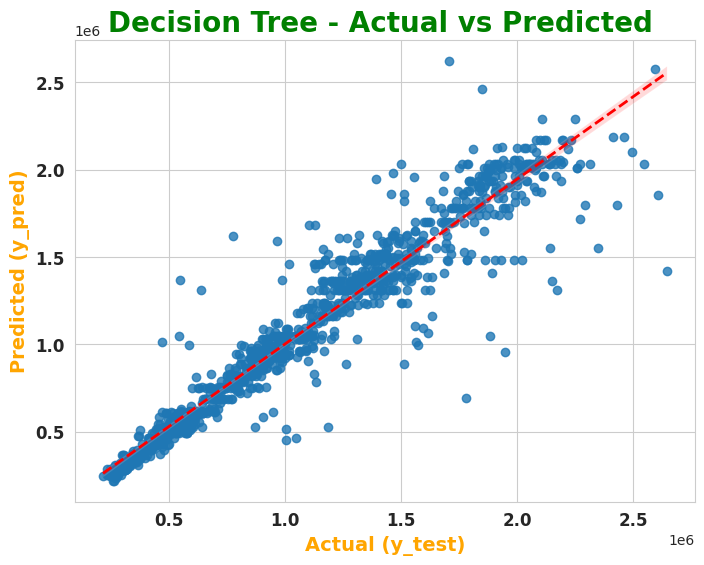

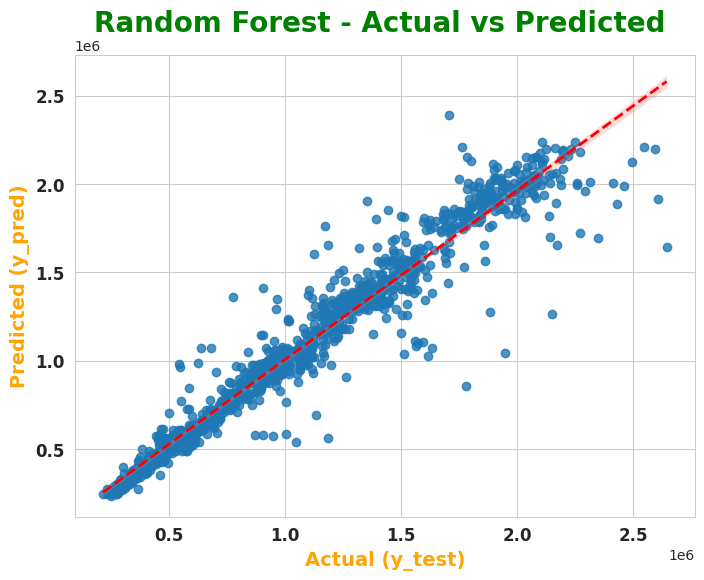

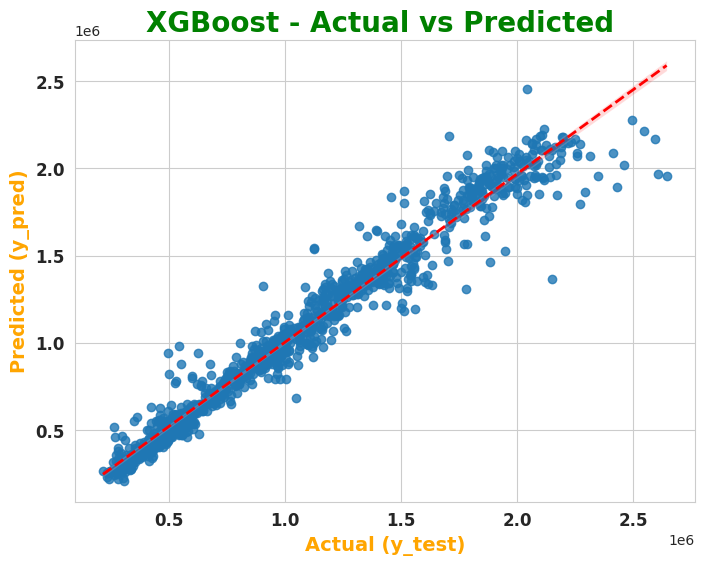

In [ ]:


for i ,row in results_df.iterrows():
  plt.figure(figsize=(8,6)),
  sns.regplot(x=row['y_test'],y=row['y_pred'],line_kws={'color':'red','linestyle':'--','linewidth':2})
  plt.title(f"{row['Model']} - Actual vs Predicted ", fontdict={'fontsize':16,'color':'lightgreen'})
  plt.xlabel('Actual (y_test)',fontdict={'fontsize':14,'color':'orange'})
  plt.ylabel('Predicted (y_pred)',fontdict={'fontsize':14,'color':'orange'})
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.show()


  <font color="pink"><h2>Insights </font>
      <font color="white"><h3>XGBOOST performs the best </font>

<font color="#FF8C00"><h2>Predict the Weekly Sales for each Stores for the NEXT 12 WEEKS.</font>

  <font color="pink"><h3>Time Series for prediction </font>

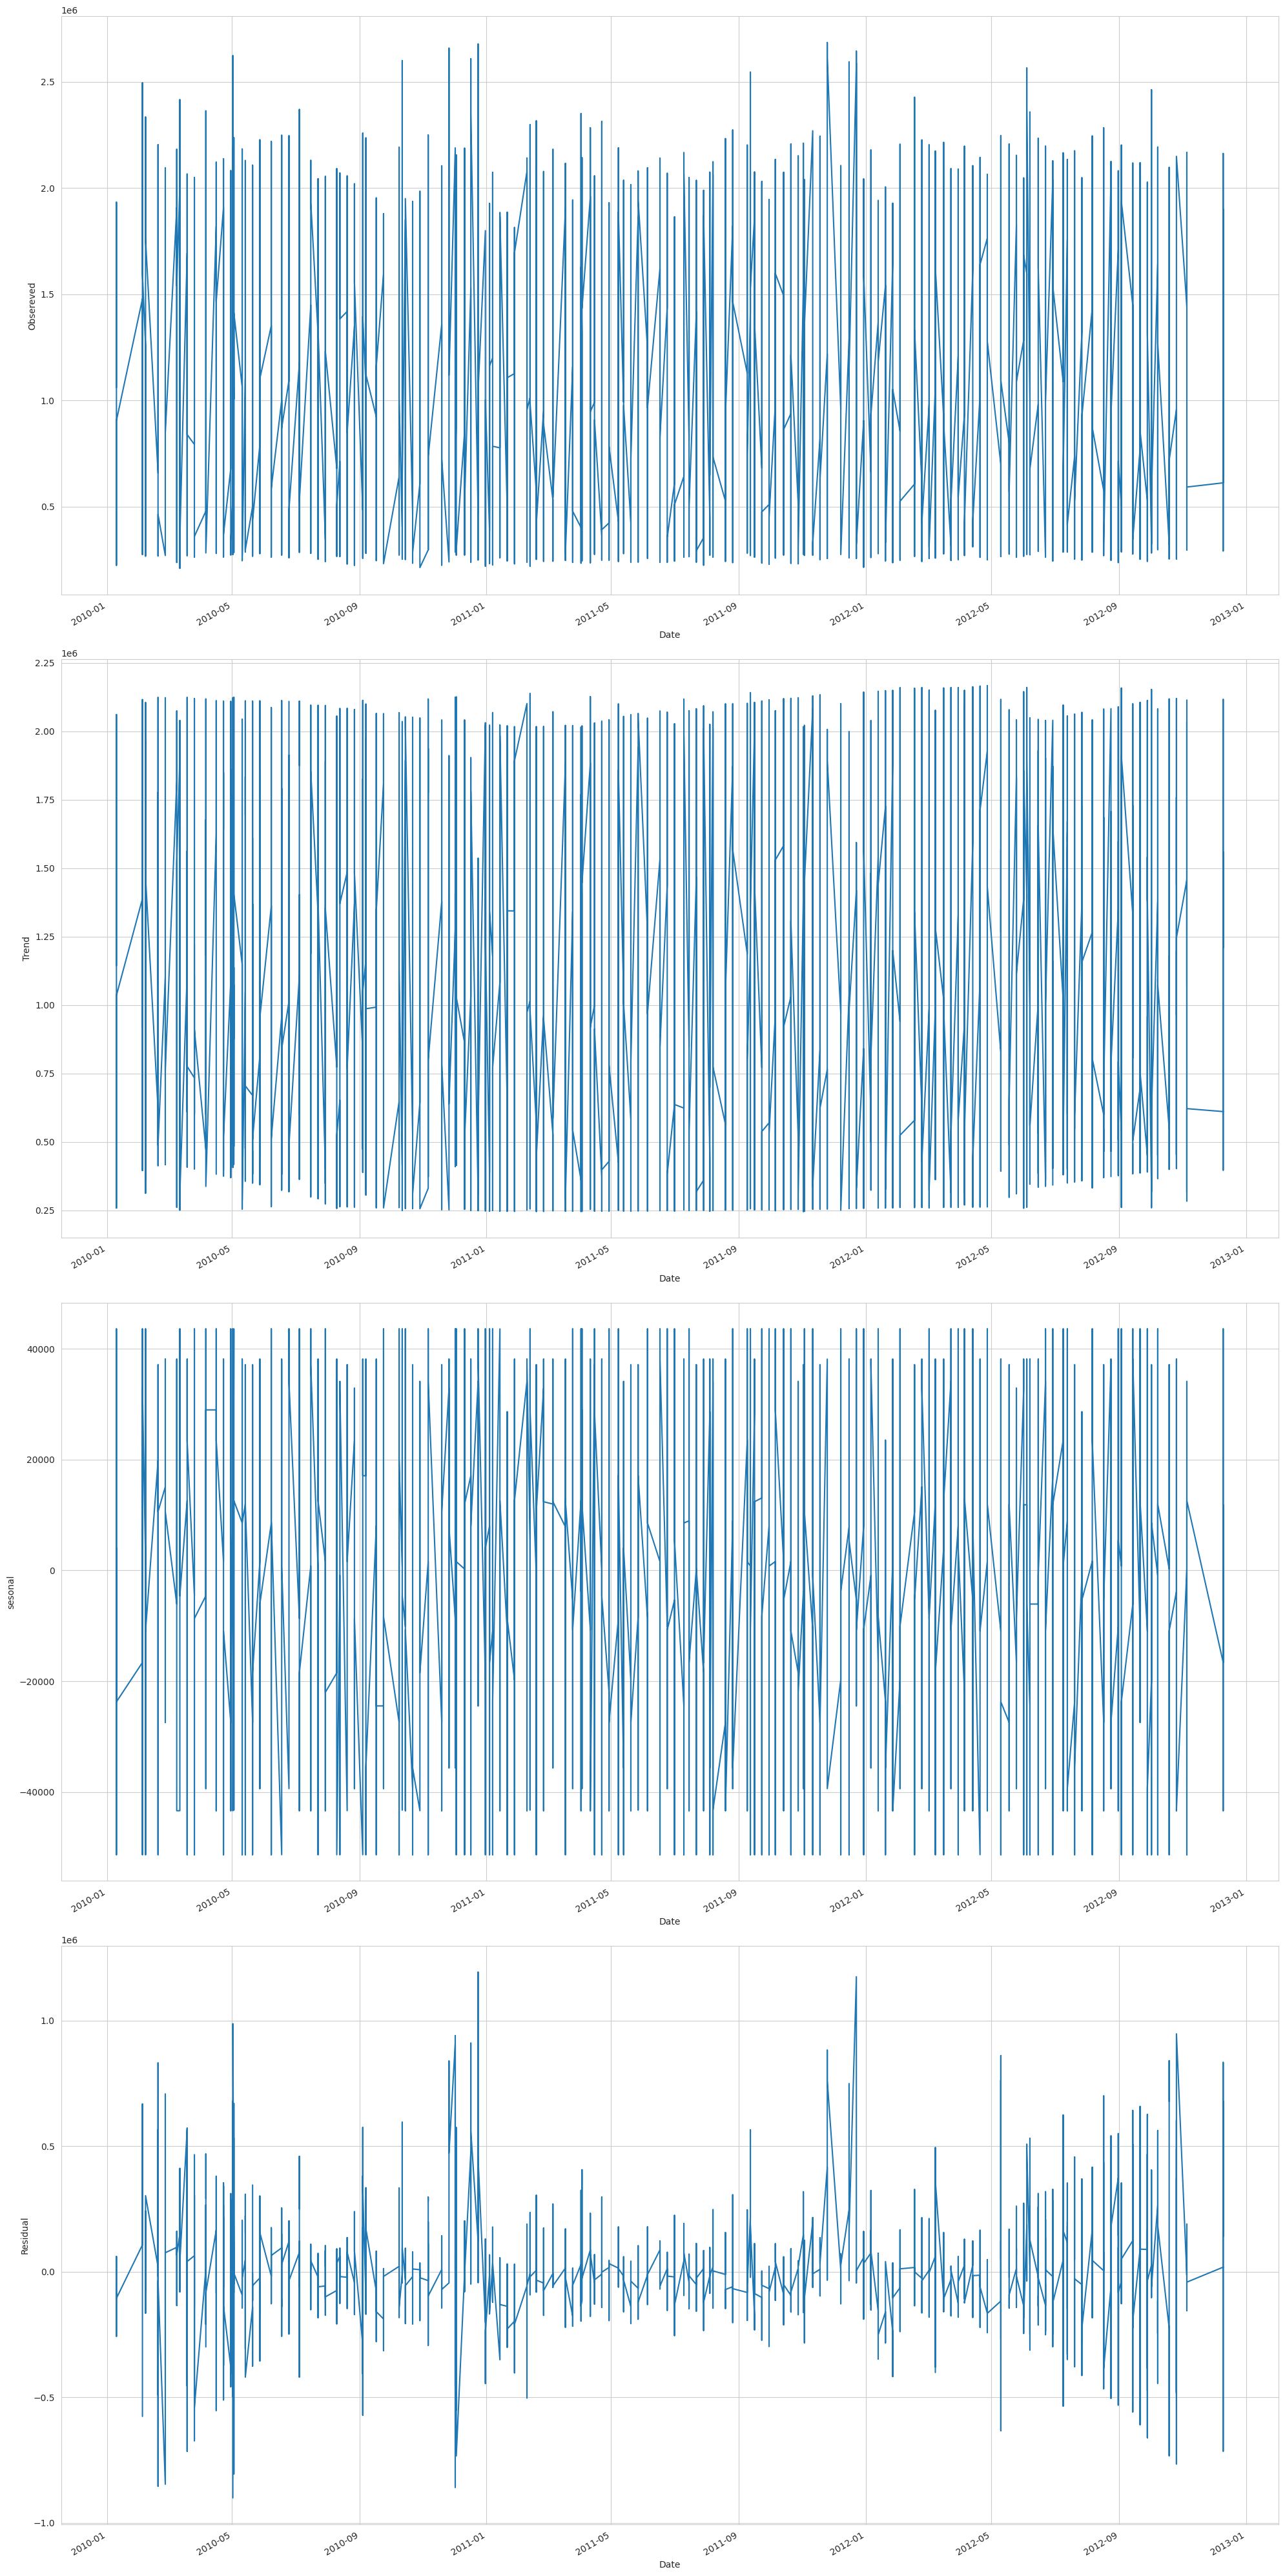

In [ ]:
#apply time series analysis to idetity seasonal trends:

#use seasonal decomposition to identify seasonal, trend and residual components

result=sm.tsa.seasonal_decompose(df['Weekly_Sales'],model='additive',period=52)

#plot the decomposed components

fig,ax=plt.subplots(4,1,figsize=(20,40))
result.observed.plot(ax=ax[0])
ax[0].set_ylabel('Obsereved')
result.trend.plot(ax=ax[1])
ax[1].set_ylabel('Trend')
result.seasonal.plot(ax=ax[2])
ax[2].set_ylabel('sesonal')
result.resid.plot(ax=ax[3])
ax[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

<font color="pink"><h1>Future Possibilities </font>

1. **Advanced Predictive Modeling**: While the current models (Decision Tree, Random Forest, XGBoost) provided satisfactory results, future work could explore more advanced forecasting models, including neural networks and time series models like ARIMA or SARIMA.

2. **Dynamic Feature Engineering**: Incorporate additional features or engineered features to enhance model accuracy. For example, adding promotional events, economic indicators, or regional data could provide a more comprehensive understanding of sales dynamics.

3. **Fine-Tuning Models**: Further hyperparameter tuning and optimization of the selected models could improve their predictive performance. Grid search techniques and Bayesian optimization can be explored for this purpose.

4. **Dynamic Inventory Management**: Utilize insights gained to optimize inventory management strategies. Understanding the impact of external factors can help Walmart plan for demand fluctuations and reduce stockouts or overstock situations.

5. **Real-Time Data Integration**: Implement real-time data integration to capture the most recent information. This would enable Walmart to adapt its strategies promptly based on changing economic conditions, consumer behavior, or external events.

6. **Geospatial Analysis**: Incorporate geospatial analysis to understand the impact of location on sales. Factors such as population density, competition, and local events can play a crucial role in store performance.

7. **Customer Segmentation**: Analyze customer segmentation to tailor marketing and sales strategies for different consumer groups. This can be achieved by leveraging data on purchasing behavior, demographics, and preferences.

8. **Collaborative Filtering**: Implement collaborative filtering techniques to provide personalized recommendations to customers. This can enhance the customer shopping experience and potentially boost sales.
    
9. **Real-time Dashboard**: Developing a real-time dashboard to visualize the predicted versus actual sales, key performance indicators, and relevant metrics could assist stakeholders in making informed decisions promptly. This would enable quick reactions to emerging trends or anomalies.

By continuously refining models, incorporating new data sources, and adopting advanced analytics techniques, Walmart can stay ahead in the highly competitive retail landscape and make informed, data-driven decisions.

This concludes the analysis and provides a roadmap for future enhancements and strategic planning for the store's sales prediction.

<font color="pink"><h1>Conclusion </font>

In conclusion, the analysis of Walmart's sales data has provided valuable insights into various factors affecting weekly sales across its multiple stores. The key findings are:

1. **Unemployment Impact**: There is a negative correlation between Weekly Sales and Unemployment Rate. Some stores show a stronger negative correlation, indicating that economic conditions may influence sales.

2. **Seasonal Trends**: The analysis suggests the presence of seasonal trends, especially during holiday weeks, which significantly impact Weekly Sales. This insight can help Walmart better prepare for peak sales periods.

3. **Temperature Influence**: Temperature appears to have an impact on Weekly Sales, with a slight positive correlation. Further analysis indicates that during colder months, sales tend to increase.

4. **CPI and Fuel Prices**: The Consumer Price Index (CPI) shows varying impacts on Weekly Sales across different stores. Fuel prices also exhibit an influence on sales, but the relationship is not as straightforward.

5. **Store Performance**: The analysis identifies top-performing and worst-performing stores based on yearly sales trends. Understanding the performance of individual stores can guide strategic decision-making.

6. **Statistical Analysis**: Detailed statistical measures, including range, average sales, standard deviation, and coefficient of variance, were computed to assess the significance of the difference between the highest and lowest performing stores.
    
7. **The predictive modeling**: The predictive models, particularly XGBoost, demonstrated strong performance in forecasting weekly sales. However, the future possibilities outlined suggest avenues for further refinement and enhancement of the forecasting process.    